In [1]:
# importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading the train and test datasets 
train_df = pd.read_csv(r"train_revised.csv")
test_df = pd.read_csv(r"test_questions.csv")

In [3]:
# Showing the first few rows of the train dataset.
train_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [4]:
# Showing the first few rows of the test dataset. 
test_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [5]:
# Shape of the train dataframe
train_df.shape

(51645, 10)

* The train_df contains 51645 rows and 10 columns

In [6]:
test_df.shape

(1111, 7)

* The test dataframe contains 1111 rows and 7 columns

In [7]:
# checking for the columns datatypes.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [8]:
# checking for null values. 
train_df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

* There are no null values on the train dataset.

In [9]:
# checking for the datatypes of the columns
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ride_id       1111 non-null   int64 
 1   travel_date   1111 non-null   object
 2   travel_time   1111 non-null   object
 3   travel_from   1111 non-null   object
 4   travel_to     1111 non-null   object
 5   car_type      1111 non-null   object
 6   max_capacity  1111 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 60.9+ KB


In [10]:
# checking for null values. 
test_df.isnull().sum()

ride_id         0
travel_date     0
travel_time     0
travel_from     0
travel_to       0
car_type        0
max_capacity    0
dtype: int64

* The test dataframe does not have null values neither.

In [11]:
# descriptive statistics of the train_df. 
train_summary_stats = train_df.describe(include='all')
train_summary_stats

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


* Mpesa is the most used mode of payment.
* The date which most people travelled on is 10-12-17.
* Most people travelled at 7:09. 
* Many people travelled form Kisii to Nairobi.
* The type of vehicle used by most of the travellers is Bus.

In [12]:
# descriptive statistics of the test_df. 
test_summary_stats = test_df.describe(include='all')
test_summary_stats 

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,1111.000000,1111,1111,1111,1111,1111,1111.000000
unique,NaN,18,79,15,1,2,NaN
top,NaN,2018-04-27,07:05,Kisii,Nairobi,Bus,NaN
freq,NaN,108,54,545,1111,599,NaN
mean,9166.707471,NaN,NaN,NaN,NaN,NaN,31.487849
std,5685.112584,NaN,NaN,NaN,NaN,NaN,18.950186
min,247.000000,NaN,NaN,NaN,NaN,NaN,11.000000
25%,3809.500000,NaN,NaN,NaN,NaN,NaN,11.000000
50%,13844.000000,NaN,NaN,NaN,NaN,NaN,49.000000
75%,14602.500000,NaN,NaN,NaN,NaN,NaN,49.000000


* Most of the travellers travelled on 2018-04-27. 
* Most travlleers travelled at 07:05 
* Most travellers travelled from Kisii.
* Bus is the most used mode of transport.

In [13]:
# changing the datatype of the travel date column. 
train_df['travel_date'] = pd.to_datetime(train_df['travel_date'], format= '%d-%m-%y')

In [14]:
train_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49


In [15]:
# checking for the changed datatype. 
train_df.dtypes

ride_id                     int64
seat_number                object
payment_method             object
payment_receipt            object
travel_date        datetime64[ns]
travel_time                object
travel_from                object
travel_to                  object
car_type                   object
max_capacity                int64
dtype: object

In [16]:
# changing the datatype of the travel_date column. 
test_df['travel_date'] = pd.to_datetime(test_df['travel_date'], errors='coerce')

In [17]:
test_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [18]:
# checking the changed datatype. 
test_df.dtypes

ride_id                  int64
travel_date     datetime64[ns]
travel_time             object
travel_from             object
travel_to               object
car_type                object
max_capacity             int64
dtype: object

## Visuals

### Number of tickets sold per ride.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


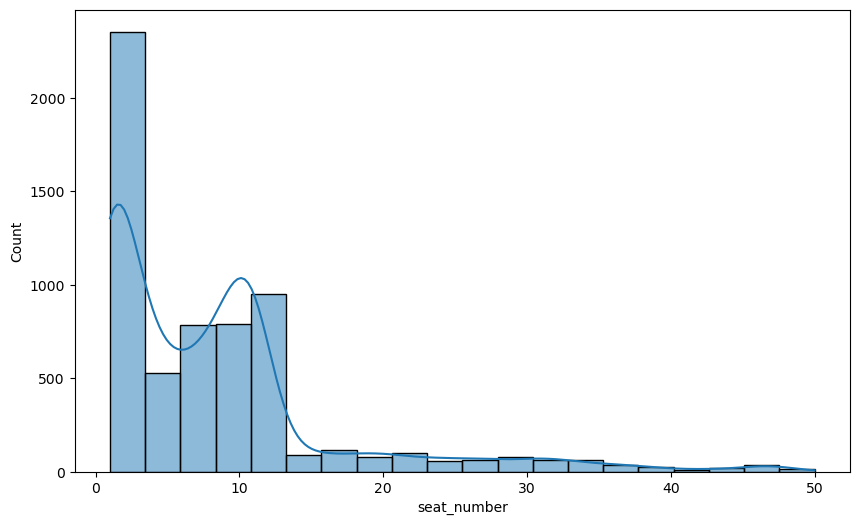

In [19]:
# calculate the number of tickets sold per ride. 
tickets_per_ride = train_df.groupby('ride_id')['seat_number'].count() 

#plotting the histogram distribution. 
plt.figure(figsize=(10,6)) 
sns.histplot(data=tickets_per_ride, bins= 20, kde= True)
plt.show()

### tickets sold by route

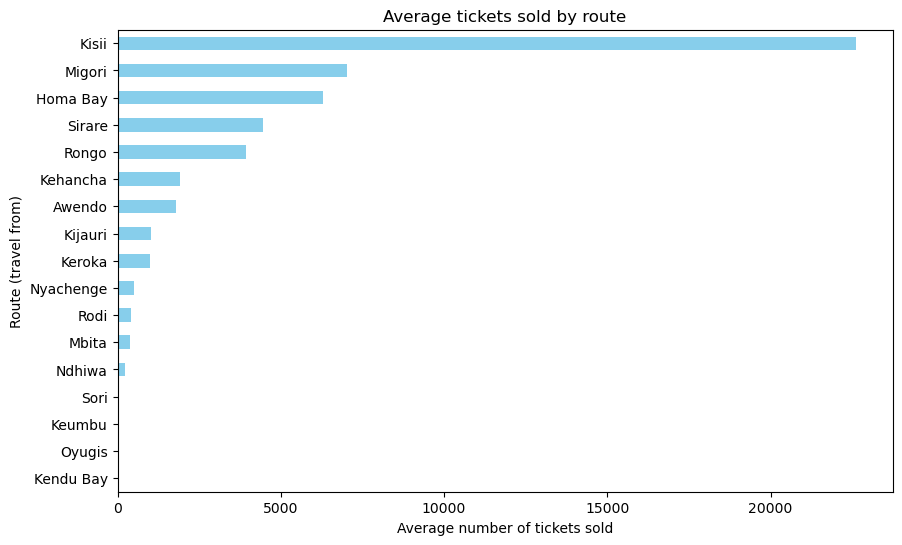

In [20]:
# calculating the average number of tickest sold per route.
avg_tickets_per_route = train_df.groupby('travel_from')['seat_number'].count().sort_values() 

# plotting 
plt.figure(figsize=(10,6)) 
avg_tickets_per_route.plot(kind = 'barh', color = 'skyblue') 
plt.title('Average tickets sold by route')
plt.xlabel('Average number of tickets sold')
plt.ylabel('Route (travel from)') 
plt.show()

* Kisii had the highest number of tickets bought, thus most travellers went form kisii to nairobi.

### Tickets sold over time.

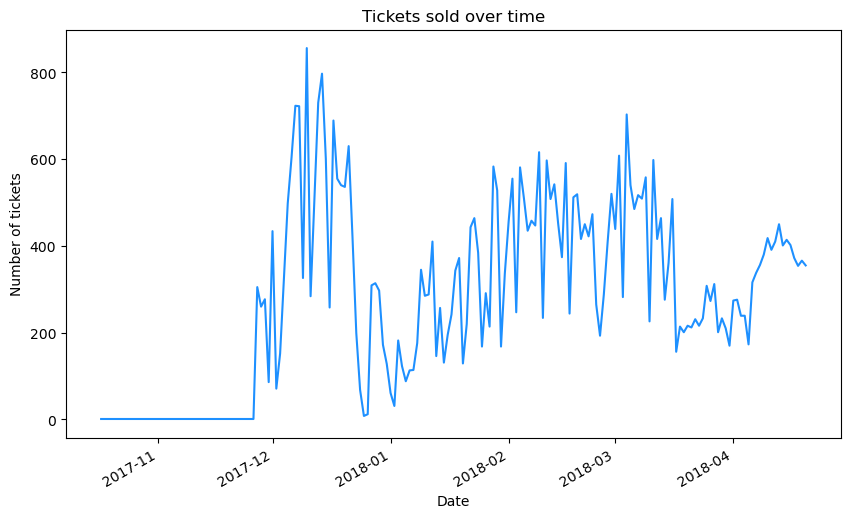

In [21]:
# calculate the tickets sold per day. 
tickets_sold_per_day = train_df.groupby('travel_date')['seat_number'].count()

# plotting. 
plt.figure(figsize=(10,6)) 
tickets_sold_per_day.plot(color= 'dodgerblue')
plt.title('Tickets sold over time') 
plt.xlabel('Date') 
plt.ylabel('Number of tickets') 
plt.show() 

### Tickets sold by day of the week.

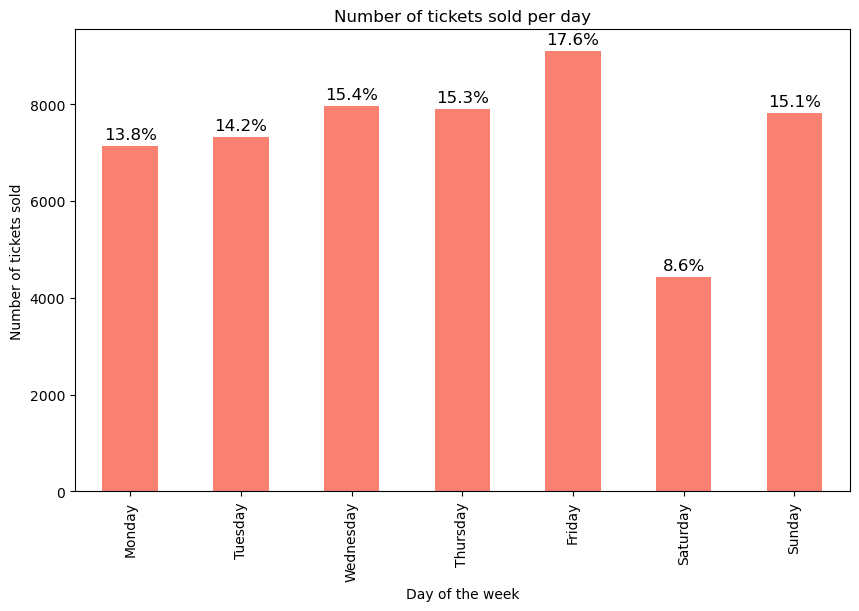

In [22]:
# extracting the day of the week. 
train_df['day_of_week'] = train_df['travel_date'].dt.day_name() 

# aggregating the tickets sale by day. 
tickets_per_day_of_week = train_df.groupby('day_of_week')['seat_number'].count()

# calculating the total number of tickets sold. 
total_tickets = tickets_per_day_of_week.sum()

# plotting
plt.figure(figsize=(10,6)) 
tickets_per_day_of_week = tickets_per_day_of_week.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) 
ax = tickets_per_day_of_week.plot(kind = 'bar', color = 'salmon') 

# annotating the bars with percentages
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_tickets:.1f}%'  # calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')  # annotate the bar

plt.title('Number of tickets sold per day')
plt.xlabel('Day of the week')
plt.ylabel('Number of tickets sold')
plt.show()

* Friday experienced the highest number of tickets sold (17.6%)

### Tickets sold by month.

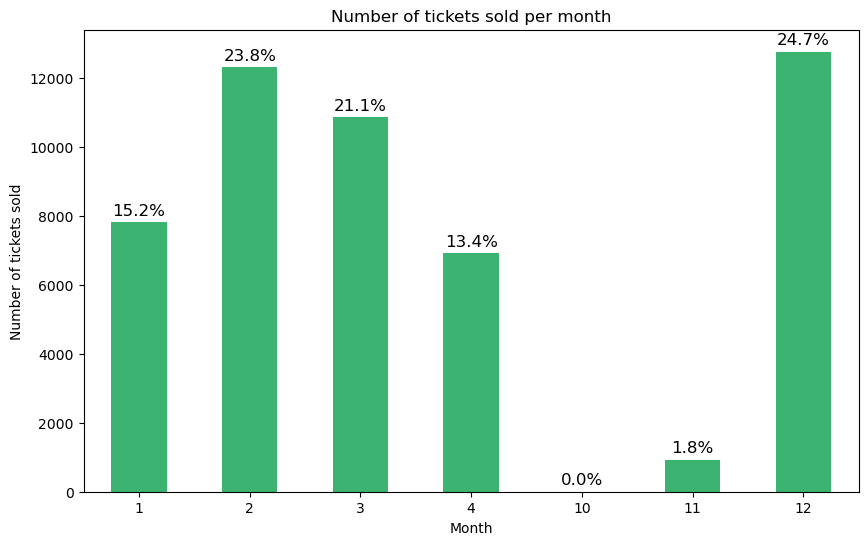

In [23]:
# Extracting month from the travel date 
train_df['Month'] = train_df['travel_date'].dt.month 

# aggregating the tickets sale by month. 
tickets_per_month = train_df.groupby('Month')['seat_number'].count() 

# Calculate total tickets sold for percentage calculation
total_tickets = tickets_per_month.sum() 


# plotting
plt.figure(figsize=(10,6)) 
ax = tickets_per_month.plot(kind = 'bar', color = 'mediumseagreen') 

# Annotating the bars with percentages
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_tickets:.1f}%'  # Calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')  # Annotate the bar
    
plt.title('Number of tickets sold per month')
plt.xlabel('Month')
plt.ylabel('Number of tickets sold')
plt.xticks(rotation=0)
plt.show()

* December recorded the highest number of ticket sales (24.7%).

### Tickets sold by car type.

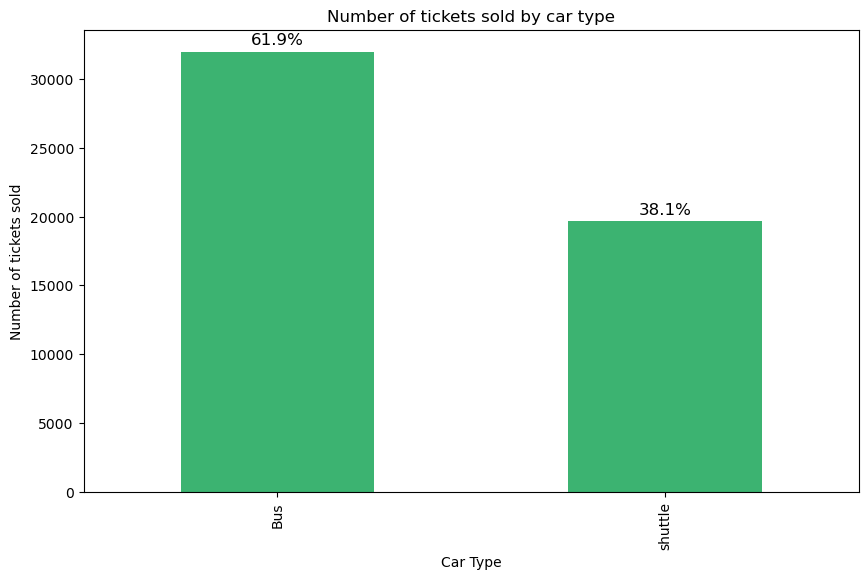

In [24]:
# calculating the average tickets by car type. 
tickets_by_car_type = train_df.groupby('car_type')['seat_number'].count() 

# calculate the total tickets sold for percentage calculation
total_tickets = tickets_by_car_type.sum() 

# plotting
plt.figure(figsize=(10,6)) 
ax = tickets_by_car_type.plot(kind = 'bar', color = 'mediumseagreen') 

# annotating the bars with percentages
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_tickets:.1f}%'  # calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')  # annotate the bar
    
plt.title('Number of tickets sold by car type')
plt.xlabel('Car Type')
plt.ylabel('Number of tickets sold')
plt.show() 

* Travels by bus recorded more tickets sale than travels by shuttle (61.9%). 

In [25]:
# I want to preprocess the test data set on the travel date column to have the day of the week and month. 
# extracting the day of the week. 
test_df['day_of_week'] = test_df['travel_date'].dt.day_name() 
test_df.head() 

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,Monday
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,Sunday
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,Friday
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,Friday
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,Friday


In [26]:
# Extracting month from the travel date 
test_df['Month'] = test_df['travel_date'].dt.month
test_df.head() 

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,Month
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,Monday,5
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,Sunday,5
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,Friday,5
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,Friday,5
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,Friday,5


In [27]:
train_new = train_df.drop(['seat_number', 'payment_method', 'payment_receipt'],axis=1) 
train_new.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,Month
0,1442,2017-10-17,7:15,Migori,Nairobi,Bus,49,Tuesday,10
1,5437,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday,11
2,5710,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday,11
3,5777,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,Monday,11
4,5778,2017-11-27,7:12,Migori,Nairobi,Bus,49,Monday,11


In [28]:
# Function to convert HH:MM to total minutes
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

# Applying the conversion to train_new
train_new['travel_time'] = train_new['travel_time'].apply(time_to_minutes)

# Applying the conversion to test_df
test_df['travel_time'] = test_df['travel_time'].apply(time_to_minutes)

In [29]:
train_new.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,Month
0,1442,2017-10-17,435,Migori,Nairobi,Bus,49,Tuesday,10
1,5437,2017-11-19,432,Migori,Nairobi,Bus,49,Sunday,11
2,5710,2017-11-26,425,Keroka,Nairobi,Bus,49,Sunday,11
3,5777,2017-11-27,430,Homa Bay,Nairobi,Bus,49,Monday,11
4,5778,2017-11-27,432,Migori,Nairobi,Bus,49,Monday,11


In [30]:
test_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,Month
0,247,2018-05-07,426,Kisii,Nairobi,Bus,49,Monday,5
1,256,2018-05-06,668,Kisii,Nairobi,shuttle,11,Sunday,5
2,275,2018-05-04,300,Kisii,Nairobi,shuttle,11,Friday,5
3,285,2018-05-04,550,Kisii,Nairobi,shuttle,11,Friday,5
4,286,2018-05-04,560,Kisii,Nairobi,shuttle,11,Friday,5


### Faeature correlation.

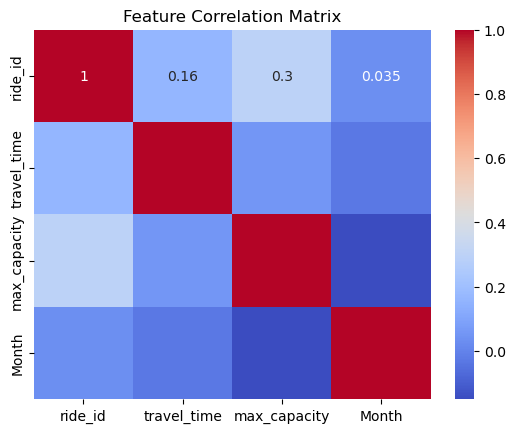

In [31]:
# Select only numeric columns for correlation calculation
numeric_columns = train_new.select_dtypes(include=['number', 'float', 'int']).columns

# Calculate the correlation matrix
corr = train_new[numeric_columns].corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## Feature Engineering.

In [32]:
# Map day names to integers (assuming Monday=0, Sunday=6)
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Apply the mapping to the 'day_of_week' column
train_new['day_of_week'] = train_new['day_of_week'].map(day_mapping)
test_df['day_of_week'] = test_df['day_of_week'].map(day_mapping)

# Creating the 'is_weekend' feature
train_new['is_weekend'] = train_new['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
test_df['is_weekend'] = test_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [33]:
train_new.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,Month,is_weekend
0,1442,2017-10-17,435,Migori,Nairobi,Bus,49,1,10,0
1,5437,2017-11-19,432,Migori,Nairobi,Bus,49,6,11,1
2,5710,2017-11-26,425,Keroka,Nairobi,Bus,49,6,11,1
3,5777,2017-11-27,430,Homa Bay,Nairobi,Bus,49,0,11,0
4,5778,2017-11-27,432,Migori,Nairobi,Bus,49,0,11,0


In [34]:
test_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,Month,is_weekend
0,247,2018-05-07,426,Kisii,Nairobi,Bus,49,0,5,0
1,256,2018-05-06,668,Kisii,Nairobi,shuttle,11,6,5,1
2,275,2018-05-04,300,Kisii,Nairobi,shuttle,11,4,5,0
3,285,2018-05-04,550,Kisii,Nairobi,shuttle,11,4,5,0
4,286,2018-05-04,560,Kisii,Nairobi,shuttle,11,4,5,0


In [35]:
# Aggregate data to get the target variable (number of tickets sold per ride)
train_agg = train_new.groupby(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type', 'max_capacity']) \
    .size().reset_index(name='number_of_tickets')

# Merge aggregated data with original data
train_new = pd.merge(train_agg, train_new, on=['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type', 'max_capacity'])
train_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,travel_to,day_of_week,Month,is_weekend
0,1442,2017-10-17,435,Migori,Bus,49,1,Nairobi,1,10,0
1,5437,2017-11-19,432,Migori,Bus,49,1,Nairobi,6,11,1
2,5710,2017-11-26,425,Keroka,Bus,49,1,Nairobi,6,11,1
3,5777,2017-11-27,430,Homa Bay,Bus,49,5,Nairobi,0,11,0
4,5777,2017-11-27,430,Homa Bay,Bus,49,5,Nairobi,0,11,0


### using label encoder to turn the categorical features that will be used into numeric format

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 

#train df
train_new['travel_from'] = le.fit_transform(train_new['travel_from']) 
train_new['car_type'] = le.fit_transform(train_new['car_type'])  

#test df 
test_df['travel_from'] = le.fit_transform(test_df['travel_from']) 
test_df['car_type'] = le.fit_transform(test_df['car_type'])

In [37]:
train_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,travel_to,day_of_week,Month,is_weekend
0,1442,2017-10-17,435,9,0,49,1,Nairobi,1,10,0
1,5437,2017-11-19,432,9,0,49,1,Nairobi,6,11,1
2,5710,2017-11-26,425,4,0,49,1,Nairobi,6,11,1
3,5777,2017-11-27,430,1,0,49,5,Nairobi,0,11,0
4,5777,2017-11-27,430,1,0,49,5,Nairobi,0,11,0


In [38]:
test_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,Month,is_weekend
0,247,2018-05-07,426,5,Nairobi,0,49,0,5,0
1,256,2018-05-06,668,5,Nairobi,1,11,6,5,1
2,275,2018-05-04,300,5,Nairobi,1,11,4,5,0
3,285,2018-05-04,550,5,Nairobi,1,11,4,5,0
4,286,2018-05-04,560,5,Nairobi,1,11,4,5,0


### Scaling the travel_time using min_max_scaler

In [39]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 

# Apply scaling to the travel_time column on both the train df and the test df. 
train_new['travel_time'] = scaler.fit_transform(train_new[['travel_time']])
test_df['travel_time'] = scaler.transform(test_df[['travel_time']])

In [40]:
train_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,travel_to,day_of_week,Month,is_weekend
0,1442,2017-10-17,0.123853,9,0,49,1,Nairobi,1,10,0
1,5437,2017-11-19,0.121101,9,0,49,1,Nairobi,6,11,1
2,5710,2017-11-26,0.114679,4,0,49,1,Nairobi,6,11,1
3,5777,2017-11-27,0.119266,1,0,49,5,Nairobi,0,11,0
4,5777,2017-11-27,0.119266,1,0,49,5,Nairobi,0,11,0


In [41]:
test_df.head() 

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,Month,is_weekend
0,247,2018-05-07,0.115596,5,Nairobi,0,49,0,5,0
1,256,2018-05-06,0.337615,5,Nairobi,1,11,6,5,1
2,275,2018-05-04,0.000000,5,Nairobi,1,11,4,5,0
3,285,2018-05-04,0.229358,5,Nairobi,1,11,4,5,0
4,286,2018-05-04,0.238532,5,Nairobi,1,11,4,5,0


## Building the model.

In [42]:
from sklearn.model_selection import train_test_split

# selection of features and target variables.
features = ['travel_time', 'travel_from', 'day_of_week', 'Month', 'is_weekend', 'car_type', 'max_capacity'] 
target = 'number_of_tickets' 

X = train_new[features] 
y = train_new[target] 

# splitting the data into training and validation sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 42)

In [43]:
# Random forest regressor. 
from sklearn.ensemble import RandomForestRegressor

# initialization and training of the model. 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error

# Predicting and evaluating the model
y_pred = model.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# R² Score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Absolute Error: 2.8010579531060906
R² Score: 0.8613685121117316


### interpretation. 
* The average absolute difference between the actual and predicted values is 2.80. This means, on average, the model's predictions are off by 2.80 units from the actual values.
* The R² score of 0.86 indicates that approximately 86% of the variance in the target variable is explained by the model. This is a strong result, suggesting that the model performs well in capturing the patterns in the data.
* Overall, these metrics suggest that the model is performing quite well, explaining a large portion of the variance and maintaining a relatively low average error. 

## Applying everything on the test dataset.

In [45]:
# Always ensure that all the preprocessing done on the train is also done on the the test.

# Aggregating the data to get the target variable (number of tickets sold per ride)
test_agg = test_df.groupby(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type', 'max_capacity']) \
    .size().reset_index(name='number_of_tickets')

# Merge aggregated data with original data
test_df = pd.merge(test_agg, test_df, on=['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type', 'max_capacity'])
test_df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets,travel_to,day_of_week,Month,is_weekend
0,247,2018-05-07,0.115596,5,0,49,1,Nairobi,0,5,0
1,256,2018-05-06,0.337615,5,1,11,1,Nairobi,6,5,1
2,275,2018-05-04,0.000000,5,1,11,1,Nairobi,4,5,0
3,285,2018-05-04,0.229358,5,1,11,1,Nairobi,4,5,0
4,286,2018-05-04,0.238532,5,1,11,1,Nairobi,4,5,0


In [48]:
# Preparing the test data
X_test = test_df[features]

# Predicting the number of tickets for each ride in the test dataset
test_df['number_of_tickets'] = model.predict(X_test)

In [51]:
# Rounding the number of tickets to the nearest whole number
test_df['number_of_tickets'] = test_df['number_of_tickets'].round().astype(int)

In [52]:
# Prepare the submission file
submission = test_df[['ride_id', 'number_of_tickets']]

In [53]:
submission

,ride_id,number_of_tickets
0,247,1
1,256,2
2,275,1
3,285,2
4,286,2
...,...,...
1106,15336,10
1107,15337,19
1108,15338,6
1109,15339,9


In [54]:
# saving the submission file in csv format.
submission.to_csv('submission.csv', index=False)